In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# lecture fichier Eucalypcus
file = open("Downloads/Eucalyptus.csv")
csvreader = csv.reader(file)

xi = 0.0
yi = 0.0
xi2 = 0.0
xiyi= 0.0
circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[0])
    h = float(row[1])
    xi += c
    yi += h
    xiyi += c*h
    xi2 += c**2
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

file.close()

beta1: 9.037475668452768, beta2: 0.257137855007109


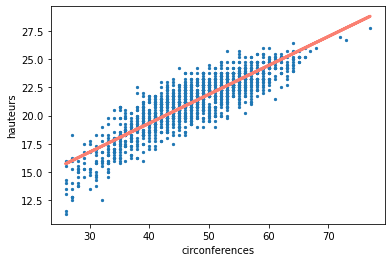

7.247535904753022e-13


In [8]:
# Question 3
n = circs.size
beta1 = (xi2*yi - xi*xiyi)/(n*xi2-xi**2)
beta2 = (n*xiyi - xi*yi)/(n*xi2-xi**2)
print(f"beta1: {beta1}, beta2: {beta2}")

y = beta1+beta2*circs

plt.scatter(circs, hauteurs,s=5)
plt.plot(circs, y, color='salmon', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

print(np.sum(y-hauteurs))